# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Importing all data sets

In [2]:
employee_data = pd.read_csv('D:/Study/Data_Engineering/02_Project/04_Go_Digital/Data For Python Assessment/employee_data.csv')

# Reading Insurance Dataset

In [3]:
insurance_data = pd.read_csv('D:/Study/Data_Engineering/02_Project/04_Go_Digital/Data For Python Assessment/insurance_data.csv')
insurance_data

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,...,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,...,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,...,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,...,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2021-06-30 00:00:00,TXN00009996,A00006029,PLC00007245,2014-04-11,2021-06-25,2021-06-26,Motor,105.75,1000,...,A,Minor Loss,Ambulance,1,1,CT,Manchester,0,AGENT00779,NaN
9996,2021-06-30 00:00:00,TXN00009997,A00003555,PLC00002590,2015-08-25,2021-06-12,2021-06-17,Life,64.59,67000,...,A,Total Loss,Police,1,0,MA,Worcester,6,AGENT00254,VNDR00598
9997,2021-06-30 00:00:00,TXN00009998,A00004230,PLC00006613,2018-10-11,2021-06-18,2021-06-23,Health,183.50,8000,...,A,Major Loss,None,1,1,OK,Oklahoma City,12,AGENT00786,VNDR00104
9998,2021-06-30 00:00:00,TXN00009999,A00006694,PLC00001781,2016-01-29,2021-06-16,2021-06-21,Motor,113.46,2000,...,A,Total Loss,Ambulance,0,1,AR,Fayetteville,6,AGENT00927,VNDR00185


# Reading Vendor Dataset

In [4]:
vendor_data = pd.read_csv('D:/Study/Data_Engineering/02_Project/04_Go_Digital/Data For Python Assessment/vendor_data.csv')

# Task 1 -
## Merge the 3 dataset and create 1 view of data

### a) Merging Insurance and Employee Datasets on 'AGENT_ID' column

In [5]:
merge_1 = pd.merge(right = insurance_data,
                   left = employee_data, 
                   right_on = 'AGENT_ID', 
                   left_on = 'AGENT_ID',
                   how = "inner")

### b) Merging Insurance and Vendor Datasets on 'VENDOR_ID' column

In [6]:
merge_2 = pd.merge(right = insurance_data,
                   left = vendor_data, 
                   right_on = "VENDOR_ID", 
                   left_on = "VENDOR_ID",
                   how = "inner")

### c) Final dataset by meging all datasets

In [7]:
final_data = pd.merge(right = merge_1,
                   left = vendor_data, 
                   right_on = "VENDOR_ID", 
                   left_on = "VENDOR_ID",
                   how = "inner")

final_data.head()

,VENDOR_ID,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,...,ACCT_NUMBER,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY
0,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703,AGENT00038,Harold Ward,1993-01-24,...,SVPG73064432886887,Masters,D,Major Loss,Ambulance,1,1,MA,Everett,20
1,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703,AGENT00045,Frances Melia,2001-03-09,...,FVND87325813310909,High School,A,Total Loss,Other,1,1,CO,Arvada,23
2,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703,AGENT00052,Evelyn Mckinney,2018-05-02,...,QTRG22676440012886,Masters,A,Minor Loss,Ambulance,1,1,AL,Montgomery,12
3,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703,AGENT00128,Richard Kessler,1998-01-03,...,EHBI65797557112163,Masters,A,Minor Loss,Other,1,1,CT,Manchester,0
4,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703,AGENT00142,Leland Low,2016-07-01,...,ZDII00910040159814,High School,A,Total Loss,Police,1,0,AR,Fayetteville,14


# ---------------------------------------------------------------------------------------------------------------

# Task 2 - 
## Business Leader wants to find Top 3 Insurance Type where we are getting most insurance claims

  INSURANCE_TYPE  CLAIM_STATUS
2         Mobile          1692
4       Property          1692
0         Health          1690
1           Life          1682
5         Travel          1670
3          Motor          1574


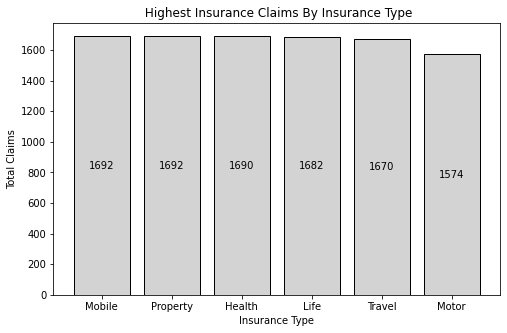

In [8]:
top_insurance_type = (insurance_data.groupby(by = 'INSURANCE_TYPE', sort= 'CLAIM_STATUS')['CLAIM_STATUS'].count().reset_index())

top_insurance_type = top_insurance_type.sort_values(by = ['CLAIM_STATUS'], ascending=False)

print(top_insurance_type)

plt.figure(figsize=(8, 5))

barplot = plt.bar(x= top_insurance_type['INSURANCE_TYPE'],
                  height= top_insurance_type['CLAIM_STATUS'],
                  fc= 'lightgray', ec= 'black')
plt.title(' Highest Insurance Claims By Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Total Claims')
plt.bar_label(barplot, labels= top_insurance_type['CLAIM_STATUS'], label_type= 'center')
plt.show()

### From above result we can say that Mobile, Property and Health this are tope 3 insurance type with 1692, 1692 and 1690 claims respectively.
# -------------------------------------------------------------------------------------------------------------

# Task 3 - 
## Business Leader wants to find Top 5 States where we are getting most insurance claims for customer belonging to HIGH(H) risk segment

   STATE  CLAIM_STATUS
4     CA           148
3     AZ           105
8     FL           104
14    TN           100
2     AR            97
5     CO            95
6     CT            92
7     DC            92
9     GA            88
1     AL            86
15    VT            83
11    MA            81
10    KY            76
12    MD            76
0     AK            66
13    OK            66


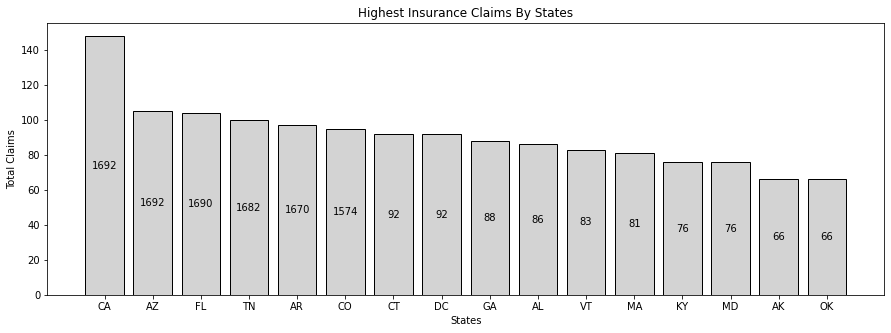

In [9]:
risk_data = insurance_data[insurance_data.RISK_SEGMENTATION == 'H']
top_risk_state = risk_data.groupby(by = 'STATE')['CLAIM_STATUS'].count().reset_index()
top_risk_state = top_risk_state.sort_values(by= ['CLAIM_STATUS'], ascending=False)
print(top_risk_state)

plt.figure(figsize=(15, 5))
barplot = plt.bar(x= top_risk_state['STATE'],
                  height= top_risk_state['CLAIM_STATUS'],
                  fc= 'lightgray', ec= 'black')
plt.title('Highest Insurance Claims By States')
plt.xlabel('States')
plt.ylabel('Total Claims')
plt.bar_label(barplot, labels= top_insurance_type['CLAIM_STATUS'], label_type= 'center')
plt.show()

### From above data frame we can conclude that California, Arizona, Florida, Tenneessee and and Arkansas this are top 5 states with the highest claims.
# --------------------------------------------------------------------------------------------------------------

# Task 4 - 
## Business wants to create a new variable “COLOCATION” which will have following values IF Customer State == Incident State == Agent Address State THEN 1 ELSE O. Find the mean of this new column

In [10]:
#code to create new column 'COLOCATION' as per given condition.
colocation = [(final_data['STATE_x'] == final_data['INCIDENT_STATE']) & (final_data['STATE_x'] == final_data['STATE_y'])]
value = [1]
final_data['COLOCATION']=np.select(colocation,value)

colocation_data = final_data.filter(['STATE_x', 'INCIDENT_STATE', 'STATE_y', 'COLOCATION']).copy()
colocation_data.head()

,STATE_x,INCIDENT_STATE,STATE_y,COLOCATION
0,GA,MA,CA,0
1,GA,CO,AZ,0
2,CT,AL,MD,0
3,CA,CT,FL,0
4,CO,AR,CA,0


In [11]:
colocation_mean = final_data['COLOCATION'].mean()
print('Colocation mean : ', colocation_mean)

Colocation mean :  0.004293116210214656


### From above data frame we can see that colocation value is '0' if all state are not same. And mean is 0.00429.
# -------------------------------------------------------------------------------------------------------------

# Task 5 -
## Data entry error was detected in the data and you are required to correct it. If for any claim transaction AUTHORITY_CONTACTED” is NOT “Police” and POLICE_AVAILABLE == 1 Then Update “AUTHORITY_CONTACTED” to Police.

In [12]:
final_data.loc[(final_data['AUTHORITY_CONTACTED'] != 'POLICE') & (final_data['POLICE_REPORT_AVAILABLE'] == 1), 
               'AUTHORITY_CONTACTED'] = 'Police'
final_data.head()

,VENDOR_ID,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,...,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,COLOCATION
0,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703,AGENT00038,Harold Ward,1993-01-24,...,Masters,D,Major Loss,Police,1,1,MA,Everett,20,0
1,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703,AGENT00045,Frances Melia,2001-03-09,...,High School,A,Total Loss,Police,1,1,CO,Arvada,23,0
2,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703,AGENT00052,Evelyn Mckinney,2018-05-02,...,Masters,A,Minor Loss,Police,1,1,AL,Montgomery,12,0
3,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703,AGENT00128,Richard Kessler,1998-01-03,...,Masters,A,Minor Loss,Police,1,1,CT,Manchester,0,0
4,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703,AGENT00142,Leland Low,2016-07-01,...,High School,A,Total Loss,Police,1,0,AR,Fayetteville,14,0


# -------------------------------------------------------------------------------------------------------------

# Task 6 -
## Business wants to check the Claim Amount for deviation for each transaction, they would like you to calculate as follow            CLAIM_DEVIATION = AVG_CLAIM_AMOUNT_FOR_LAST_30DAYS (same insurance type) / CURRENT_CLAIM_AMOUNT. If the value < 0.5 THEN CLAIM_DEVIATION = 1 ELSE 0. If there is less than 30 days of transaction history THEN -1 Note: LAST_30DAYS does not include current day

In [13]:
df = insurance_data[(insurance_data['TXN_DATE_TIME'] >= '2021-06-01 00:00')
                   & (insurance_data['TXN_DATE_TIME'] < '2021-06-31 00:00')]

total_claim_amount = pd.DataFrame(df.groupby(by = 'INSURANCE_TYPE', sort= 'CLAIM_AMOUNT')['CLAIM_AMOUNT'].sum().reset_index())
total_claim_count = pd.DataFrame(df.groupby(by = 'INSURANCE_TYPE', sort= 'CLAIM_AMOUNT')['CLAIM_AMOUNT'].count().reset_index())
avg_claim_amount = (total_claim_amount['CLAIM_AMOUNT']) / (total_claim_count['CLAIM_AMOUNT'])

In [14]:
avg_claim = pd.merge(right = total_claim_amount,
                   left = total_claim_count, 
                   right_on = 'INSURANCE_TYPE', 
                   left_on = 'INSURANCE_TYPE',
                   how = "inner")

avg_claim.rename(columns= {'CLAIM_AMOUNT_x' : 'TOTAL_CLAIM_COUNT', 'CLAIM_AMOUNT_y' : 'TOTAL_CLAIM_AMOUNT'}, inplace= True)
avg_claim['AVG_CLAIM_AMOUNT'] = ((avg_claim['TOTAL_CLAIM_AMOUNT']) / (avg_claim['TOTAL_CLAIM_COUNT']))
avg_claim.drop('TOTAL_CLAIM_COUNT', inplace= True, axis= 1)
avg_claim.drop('TOTAL_CLAIM_AMOUNT', inplace= True, axis= 1)

claim_deviation = pd.merge(right = insurance_data,
                   left = avg_claim, 
                   right_on = 'INSURANCE_TYPE', 
                   left_on = 'INSURANCE_TYPE',
                   how = "inner")
claim_deviation = claim_deviation[['TXN_DATE_TIME','TRANSACTION_ID','CUSTOMER_ID',
                                   'INSURANCE_TYPE','CLAIM_AMOUNT','AVG_CLAIM_AMOUNT']]
claim_deviation['CLAIM_DEVIATION'] = ((claim_deviation['AVG_CLAIM_AMOUNT']) / (claim_deviation['CLAIM_AMOUNT']))
claim_deviation = claim_deviation.round(2)

CLAIM_DEVIATION_1 = [(claim_deviation['CLAIM_DEVIATION'] < 0.5)]
value = [1]
claim_deviation['CLAIM_DEVIATION']=np.select(CLAIM_DEVIATION_1,value)

claim_deviation.head()

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,INSURANCE_TYPE,CLAIM_AMOUNT,AVG_CLAIM_AMOUNT,CLAIM_DEVIATION
0,2020-06-01 00:00:00,TXN00000001,A00003822,Health,9000,10984.96,0
1,2020-06-01 00:00:00,TXN00000004,A00007572,Health,16000,10984.96,0
2,2020-06-01 00:00:00,TXN00000007,A00007245,Health,3000,10984.96,0
3,2020-06-01 00:00:00,TXN00000013,A00003693,Health,11000,10984.96,0
4,2020-06-01 00:00:00,TXN00000021,A00004720,Health,17000,10984.96,0


# --------------------------------------------------------------------------------------------------------------

# Task 7 - 
## Find All Agents who have worked on more than 2 types of Insurance Claims. Sort them by Total Claim Amount Approved under them in descending order

In [15]:
agents_data = pd.DataFrame(final_data.groupby(['AGENT_NAME','CLAIM_AMOUNT'])['INSURANCE_TYPE'].count().reset_index().
                           sort_values('CLAIM_AMOUNT',ascending=False))

agents_data = agents_data[agents_data['INSURANCE_TYPE'] > 2]

agents_data.head()

,AGENT_NAME,CLAIM_AMOUNT,INSURANCE_TYPE
2182,Glenda Briney,20000,3
2953,John Martin,20000,3
34,Agnes Alsip,15000,3
2025,Gabriel Lucas,14000,3
576,Bobbie Burwell,12000,3


# -------------------------------------------------------------------------------------------------------------

# Task 8 - 
## Mobile & Travel Insurance premium are discounted by 10%, Health and Property Insurance premium are increased by 7%, Life and Motor Insurance premium are marginally increased by 2%. What will be overall change in % of the Premium Amount Collected for all these Customer

In [16]:
pd.DataFrame(final_data.groupby(['INSURANCE_TYPE'])['PREMIUM_AMOUNT'].sum())

,PREMIUM_AMOUNT
INSURANCE_TYPE,
Health,168515.90
Life,85624.88
Mobile,10308.58
Motor,114052.48
Property,133258.61
Travel,84219.63


In [17]:
total_premium = final_data['PREMIUM_AMOUNT'].sum()
print('Total premium amount : ', total_premium)

Total premium amount :  595980.08


In [18]:
new_premium = pd.DataFrame()

new_premium['INSURANCE_TYPE'] = ['Health','Life','Mobile','Motor','Property','Travel']

new_premium['OLD_PREMIUM_AMOUNT'] = [168515.90, 85624.88, 10308.58, 114052.48, 133258.61, 84219.63]

new_premium['OLD_PERSENTAGE'] = (new_premium['OLD_PREMIUM_AMOUNT'] / total_premium) * 100

new_premium

,INSURANCE_TYPE,OLD_PREMIUM_AMOUNT,OLD_PERSENTAGE
0,Health,168515.90,28.275425
1,Life,85624.88,14.367071
2,Mobile,10308.58,1.729685
3,Motor,114052.48,19.136962
4,Property,133258.61,22.359575
5,Travel,84219.63,14.131283


### According to old premium structure,
* Mobile and Travel insurance type hold 15.86% of total.
* Health and Property insurance type hold 50.63% of total.
* Life and Motor insurance type hold 33.50% of total.

### Now, calculating as per new premium structure -
* Mobile & Travel Insurance premium are discounted by 10%
* Health and Property Insurance premium are increased by 7%
* Life and Motor Insurance premium are marginally increased by 2%


In [19]:
new_mobile_premium = (10308.58 * 10) / 100

new_travel_premium = (84219.63 * 10) / 100

new_health_premium = (168515.90 * 7) / 100

new_property_premium = (133258.61 * 7) / 100

new_life_premium = (85624.88 * 2) / 100

new_motor_premium = (114052.48 * 2) / 100

In [20]:
new_premium['NEW_PREMIUM_AMOUNT'] = [(168515.90 + new_health_premium), (85624.88 + new_life_premium), (10308.58 - new_mobile_premium),
                                    (114052.48 + new_motor_premium), (133258.61 + new_property_premium), (84219.63 - new_travel_premium)]

new_total_premium = new_premium['NEW_PREMIUM_AMOUNT'].sum()

new_premium['NEW_PERSENTAGE'] = (new_premium['NEW_PREMIUM_AMOUNT'] / new_total_premium) * 100

new_premium

,INSURANCE_TYPE,OLD_PREMIUM_AMOUNT,OLD_PERSENTAGE,NEW_PREMIUM_AMOUNT,NEW_PERSENTAGE
0,Health,168515.90,28.275425,180312.0130,29.479846
1,Life,85624.88,14.367071,87337.3776,14.279096
2,Mobile,10308.58,1.729685,9277.7220,1.516847
3,Motor,114052.48,19.136962,116333.5296,19.019779
4,Property,133258.61,22.359575,142586.7127,23.312004
5,Travel,84219.63,14.131283,75797.6670,12.392428


### According to new premium structure,
* Mobile and Travel insurance type hold 13.90% of total.
* Health and Property insurance type hold 52.79% of total.
* Life and Motor insurance type hold 33.29% of total.
# --------------------------------------------------------------------------------------------------------------

# Task 9 - 
## Business wants to give discount to customer who are loyal and under stress due to Covid 19. They have laid down an eligibility Criteria as, IF CUSTOMER_TENURE > 60 AND EMPLOYMENT_STATUS = “N” AND NO_OF_FAMILY_MEMBERS >=4 THEN 1 ELSE 0. Create a new column “ELIGIBLE_FOR_DISCOUNT” and find it mean.

In [21]:
loyal_customer = final_data[['TENURE','EMPLOYMENT_STATUS','NO_OF_FAMILY_MEMBERS']]

loyal_customer.head()

,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS
0,39,Y,3
1,84,Y,6
2,91,Y,5
3,99,Y,7
4,109,Y,2


In [22]:
eligibal_criteria = [(final_data['TENURE'] > 60) & (final_data['EMPLOYMENT_STATUS'] == 'N') & (final_data['NO_OF_FAMILY_MEMBERS'] >= 4)]

loyal_customer['ELIGIBAL_FOR_DISCOUNT'] = np.select(eligibal_criteria,value)

In [23]:
eligibal_mean = loyal_customer['ELIGIBAL_FOR_DISCOUNT'].mean()

print('Eligibal customer mean : ', eligibal_mean)

Eligibal customer mean :  0.03005181347150259


### From above data frame we can see that new column 'ELIGIBAL_FOR_DISCOUNT' is created as per condition. And mean is 0.030.
# -------------------------------------------------------------------------------------------------------------

# Task 10 -
## Business wants to check Claim Velocity which is defined as follow            CLAIM_VELOCITY = NO_OF_CLAIMS_IN_LAST30DAYS (for the current insurance type) / NO_OF_CLAIMS_IN_LAST3DAYS (for the current insurance type). Note: LAST30DAYS & LAST3DAYS does not include current day

In [24]:
df1 = insurance_data[(insurance_data['TXN_DATE_TIME'] >= '2021-06-01 00:00')
                   & (insurance_data['TXN_DATE_TIME'] < '2021-06-31 00:00')]

no_claims_30days = pd.DataFrame(df1.groupby(by = 'INSURANCE_TYPE', sort= True)['CLAIM_STATUS'].count().reset_index())

In [25]:
df2 = insurance_data[(insurance_data['TXN_DATE_TIME'] >= '2021-06-28 00:00')
                   & (insurance_data['TXN_DATE_TIME'] < '2021-06-31 00:00')]

no_claims_3days = pd.DataFrame(df2.groupby(by = 'INSURANCE_TYPE', sort= True)['CLAIM_STATUS'].count().reset_index())

In [26]:
claim_velocity = pd.merge(right = no_claims_30days,
                   left = no_claims_3days, 
                   right_on = 'INSURANCE_TYPE', 
                   left_on = 'INSURANCE_TYPE',
                   how = "inner")

claim_velocity.rename(columns= {'CLAIM_STATUS_x' : 'LAST_3DAYS_COUNT', 'CLAIM_STATUS_y' : 'LAST_30DAYS_COUNT'}, inplace= True)
claim_velocity['CLAIM_VELOCITY'] = ((claim_velocity['LAST_30DAYS_COUNT']) / (claim_velocity['LAST_3DAYS_COUNT']))
claim_velocity.round(2)

,INSURANCE_TYPE,LAST_3DAYS_COUNT,LAST_30DAYS_COUNT,CLAIM_VELOCITY
0,Health,11,133,12.09
1,Life,15,143,9.53
2,Mobile,7,134,19.14
3,Motor,15,124,8.27
4,Property,13,126,9.69
5,Travel,15,124,8.27


# Task 11 - 
## Find all low performing agents i.e. employees who are in the bottom 5 percentile based on Claims worked by them.

In [27]:
low_performing_agent = pd.DataFrame(final_data.groupby(['AGENT_NAME'])['CLAIM_AMOUNT'].count().reset_index().
                                    sort_values(['CLAIM_AMOUNT'],ascending=False))

bottom_agent = low_performing_agent.quantile(0.05)

bottom_agent

CLAIM_AMOUNT    2.0
Name: 0.05, dtype: float64

### Agents whos claim amount is less than or equal to 2.0 are low performing agents.

In [28]:
low_performing_agent = low_performing_agent[low_performing_agent['CLAIM_AMOUNT']  <= 2.0]

low_performing_agent.head()

,AGENT_NAME,CLAIM_AMOUNT
628,Keith Thomas,2
454,James Castlen,2
627,Keith Davis,2
612,Karen Brown,2
426,Heather Piper,2


# --------------------------------------------------------------------------------------------------------------

# Task 12 - 
## Business wants to find all Suspicious Employees (Agents). IF TOTAL CLAIM AMOUNT which meet below criteria is >= 15000 THEN AGENT is classified as Suspicious ELSE Not CLAIM_STATUS = Approved AND CUSTOMER_RISK_SEGMENTATION = High AND INCIDENT_SEVERITY = “Major Loss” If Suspicious, then 1 ELSE 0. Find mean of this column.

In [29]:
suspicious_agent = final_data[['AGENT_NAME', 'CLAIM_AMOUNT', 'CLAIM_STATUS','RISK_SEGMENTATION','INCIDENT_SEVERITY']]

suspicious_agent = suspicious_agent[(suspicious_agent['CLAIM_STATUS'] == 'A') & (suspicious_agent['RISK_SEGMENTATION'] == 'H') 
                                    & (suspicious_agent['INCIDENT_SEVERITY'] == 'Major Loss')]

In [30]:
suspicious_criteria = [suspicious_agent['CLAIM_AMOUNT'] >= 15000]

value = [1]

suspicious_agent['SUSPICIOUS_AGENT'] = np.select(suspicious_criteria, value)

In [31]:
suspicious_mean = suspicious_agent['SUSPICIOUS_AGENT'].mean()

print('Suspicious agent mean : ', suspicious_mean)

Suspicious agent mean :  0.3217993079584775


### In above data frame we can see that new column is created as 'SUSPICIOUS_AGENT' as per given condition and mean is 0.321.
# --------------------------------------------------------------------------------------------------------------